<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [28]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [30]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [31]:
data=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


## Boxplot for the "Median value of owner-occupied homes" (MEDV)



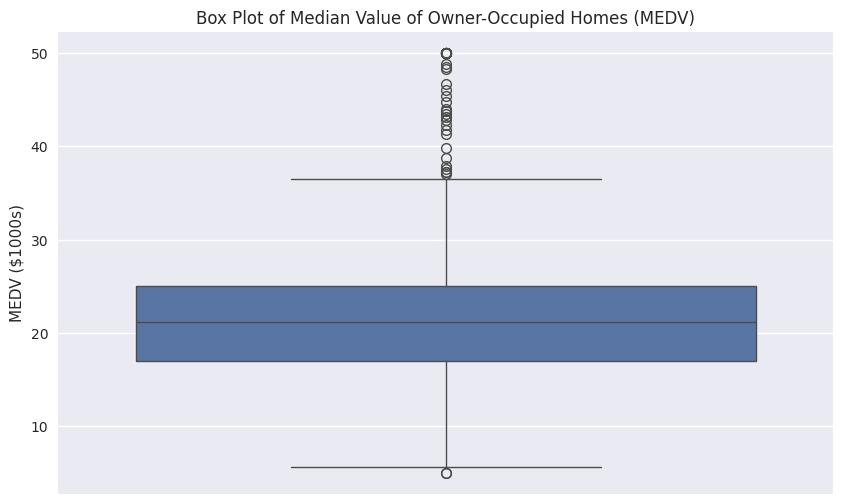

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['MEDV'])
plt.title('Box Plot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('MEDV ($1000s)')
plt.show()

The boxplot shows the distribution of home prices (in $1000s). The median value is around $21,000. There are some outliers in the higher price range, indicating that while most homes fall within a certain range, there are some exceptionally high-priced homes.

## Bar Plot for the Charles River Variable (CHAS)


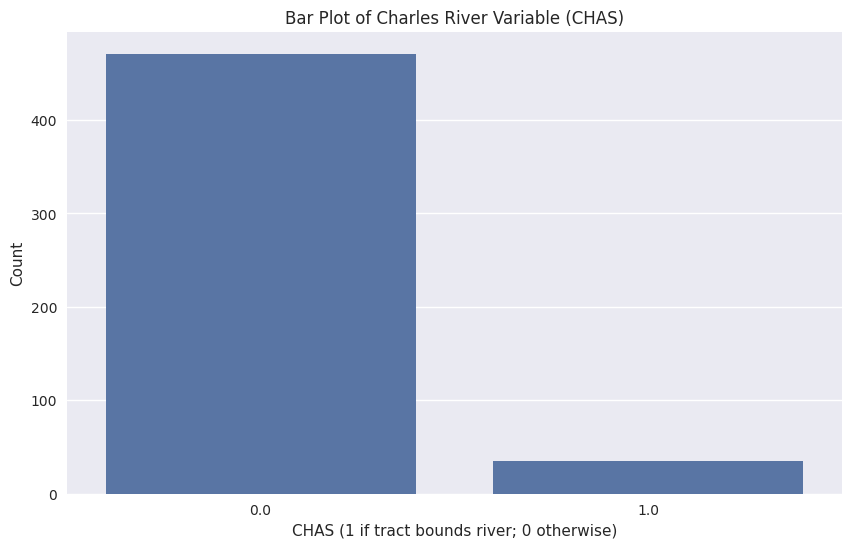

In [33]:
# Bar plot for the CHAS variable
plt.figure(figsize=(10, 6))
sns.countplot(x='CHAS', data=data)
plt.title('Bar Plot of Charles River Variable (CHAS)')
plt.xlabel('CHAS (1 if tract bounds river; 0 otherwise)')
plt.ylabel('Count')
plt.show()

The bar plot shows that a majority of the towns do not bound the Charles River, as indicated by the higher count for CHAS = 0. Only a small number of towns have tracts that bound the river (CHAS = 1).

## Boxplot for MEDV vs. AGE
First, we need to discretize the AGE variable into three groups: 35 years and younger, between 35 and 70 years, and 70 years and older.

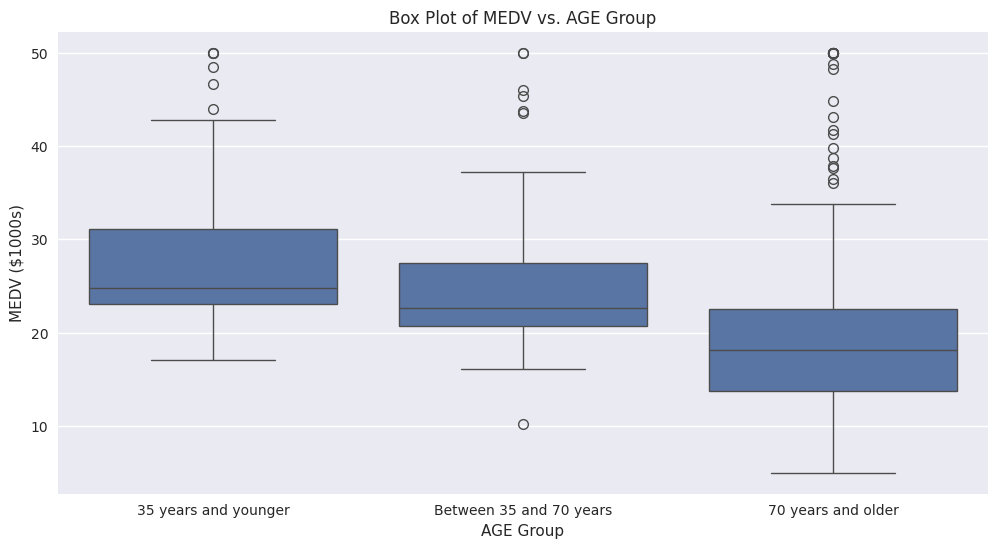

In [34]:
# Discretize AGE into three groups
age_groups = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Add the age_groups to the dataframe
data['AGE_Group'] = age_groups

# Box plot of MEDV vs. AGE_Group
plt.figure(figsize=(12, 6))
sns.boxplot(x='AGE_Group', y='MEDV', data=data)
plt.title('Box Plot of MEDV vs. AGE Group')
plt.xlabel('AGE Group')
plt.ylabel('MEDV ($1000s)')
plt.show()

The boxplot shows the relationship between the age of buildings and home prices. Homes in areas with buildings older than 70 years have a slightly lower median value compared to newer areas. This suggests that newer constructions might be more valued. However, there is a considerable overlap, and older areas still have a wide range of home prices.

## Scatter Plot for Nitric Oxide Concentrations (NOX) and Proportion of Non-Retail Business Acres (INDUS)

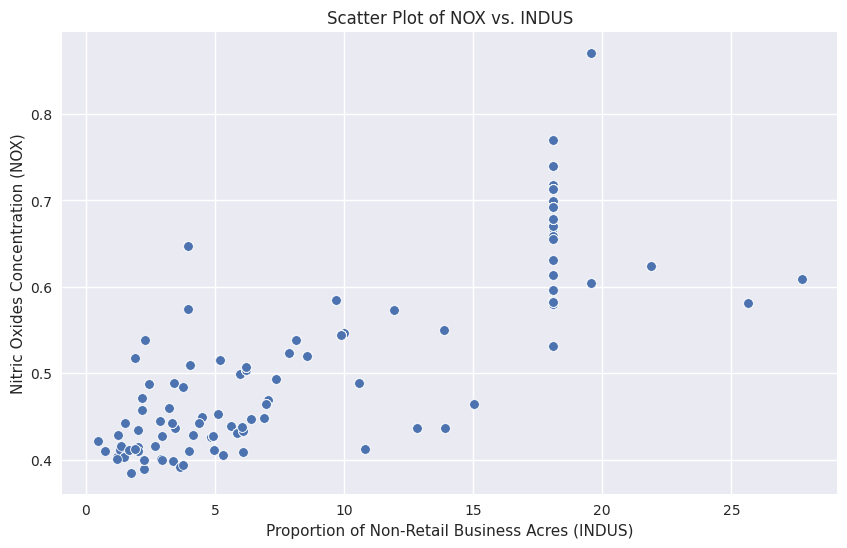

In [35]:
# Scatter plot of NOX vs. INDUS
plt.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=data)
plt.title('Scatter Plot of NOX vs. INDUS')
plt.xlabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.ylabel('Nitric Oxides Concentration (NOX)')
plt.show()

From the scatter plot of Nitric Oxide Concentrations (NOX) vs. the proportion of non-retail business acres (INDUS), we can observe there is a pattern or correlation between these variables. Typically, one might expect that higher industrial activity (higher INDUS) could lead to higher pollution levels (higher NOX).


## Histogram for the Pupil to Teacher Ratio Variable (PTRATIO)


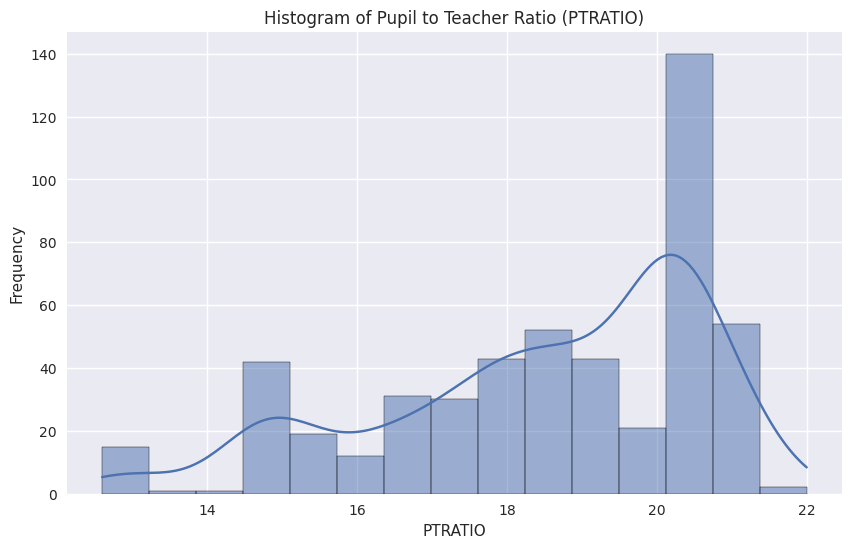

In [36]:
# Histogram of PTRATIO
plt.figure(figsize=(10, 6))
sns.histplot(data['PTRATIO'], bins=15, kde=True)
plt.title('Histogram of Pupil to Teacher Ratio (PTRATIO)')
plt.xlabel('PTRATIO')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of the pupil-to-teacher ratio. Most towns have a pupil-to-teacher ratio between 16 and 20, with a peak around 18. This suggests that the majority of towns have similar education resources in terms of class sizes.


### Summary
#### MEDV: Home prices have a wide range with some high-priced outliers. The median price is around $21,000.
#### CHAS: Most towns do not bound the Charles River.
#### AGE and MEDV: Older areas (buildings > 70 years) tend to have lower home prices, but there is significant overlap across different age groups.
#### NOX and INDUS: There is a positive relationship between industrial activity and air pollution.
#### PTRATIO: Most towns have a similar pupil-to-teacher ratio, concentrated around 18.

## Question 1: 
Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)
### Hypothesis:
#### Null Hypothesis (H0): There is no significant difference in the median value of houses bounded by the Charles river (CHAS=1) and those that are not (CHAS=0).
#### Alternative Hypothesis (H1): There is a significant difference in the median value of houses bounded by the Charles river (CHAS=1) and those that are not (CHAS=0).

In [37]:
from scipy.stats import ttest_ind

# Split the data based on the CHAS variable
chas_0 = data[data['CHAS'] == 0]['MEDV']
chas_1 = data[data['CHAS'] == 1]['MEDV']

# Perform a t-test
t_stat, p_value = ttest_ind(chas_0, chas_1)

# Display the result
print(f'T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}')

T-statistic: -3.9964, P-value: 0.0001


## Conclusion:
The p-value < α (0.05), we reject the null hypothesis and we accept H1: There is a significant difference in the median value of houses bounded by the Charles river (CHAS=1) and those that are not (CHAS=0).

## Question 2: 
Is there a difference in Median values of houses (MEDV) for each proportion of owner-occupied units built prior to 1940 (AGE)? (ANOVA)
### Hypothesis:
#### Null Hypothesis (H0): There is no difference in the median value of houses for different proportions of owner-occupied units built prior to 1940.
#### Alternative Hypothesis (H1): There is a difference in the median value of houses for different proportions of owner-occupied units built prior to 1940.

In [38]:
# Import necessary libraries
from scipy.stats import f_oneway

# Discretize AGE into three groups
age_groups = pd.cut(data['AGE'], bins=[0, 35, 70, 100], labels=['35 years and younger', 'Between 35 and 70 years', '70 years and older'])

# Perform ANOVA
group1 = data[data['AGE_Group'] == '35 years and younger']['MEDV']
group2 = data[data['AGE_Group'] == 'Between 35 and 70 years']['MEDV']
group3 = data[data['AGE_Group'] == '70 years and older']['MEDV']

f_stat, p_value = f_oneway(group1, group2, group3)

# Display the result
print(f'F-statistic: {f_stat:.4f}, P-value: {p_value:.4f}')

F-statistic: 36.4076, P-value: 0.0000


### Conclusion:

the p-value < α (0.05), we reject the null hypothesis and we accept H1

## Question 3: 
Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
### Hypothesis:
#### Null Hypothesis (H0): There is no relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).
#### Alternative Hypothesis (H1): There is a relationship between Nitric oxide concentrations (NOX) and the proportion of non-retail business acres (INDUS).

In [39]:
# Import necessary libraries
from scipy.stats import pearsonr

# Perform Pearson correlation
corr, p_value = pearsonr(data['NOX'], data['INDUS'])

# Display the result
print(f'Pearson Correlation Coefficient: {corr:.4f}, P-value: {p_value:.4f}')

Pearson Correlation Coefficient: 0.7637, P-value: 0.0000


### Conclusion:
the p-value < α (0.05), we reject the null hypothesis.

## Question 4: 
What is the impact of an additional weighted distance to the five Boston employment centres on the median value of owner-occupied homes? (Regression analysis)
### Hypothesis:
#### Null Hypothesis (H0): There is no impact of the weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).
#### Alternative Hypothesis (H1): There is an impact of the weighted distance to the five Boston employment centres (DIS) on the median value of owner-occupied homes (MEDV).

In [40]:
# Import necessary libraries
import statsmodels.api as sm

# Define the independent variable (DIS) and the dependent variable (MEDV)
X = data['DIS']
y = data['MEDV']

# Add a constant to the independent variable
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(y, X).fit()

# Display the summary of the regression model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 17 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        12:17:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

### Conclusion:
We look at the p-value for the DIS coefficient in the regression summary. the p-value < α (0.05), we reject the null hypothesis.